In [36]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# آپلود فایل تصویری
from google.colab import files
uploaded = files.upload()

# خواندن تصویر
image = cv2.imread(list(uploaded.keys())[0])

# تبدیل تصویر به مقیاس خاکستری
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# اعمال فیلتر Gaussian برای کاهش نویز
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# باینری کردن تصویر با استفاده از روش Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# پیدا کردن کانتورها
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# شناسایی و نمایش اشکال هندسی
for contour in contours:
    # تقریب چند ضلعی برای تشخیص شکل
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 10

    # تشخیص نوع شکل و نمایش آن
    if len(approx) == 4:
        aspect_ratio = float(cv2.boundingRect(approx)[2]) / cv2.boundingRect(approx)[3]
        if 0.95 <= aspect_ratio <= 1.05:
            shape_name = "Square"
        else:
            shape_name = "Rectangle"
        cv2.drawContours(image, [approx], 0, (0, 0, 255), 5)
        cv2.putText(image, shape_name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    elif len(approx) == 5:
        cv2.drawContours(image, [approx], 0, (255, 0, 0), 5)
        cv2.putText(image, "Pentagon", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    elif len(approx) > 5 and cv2.isContourConvex(approx):
        cv2.drawContours(image, [approx], 0, (255, 255, 0), 5)
        cv2.putText(image, "Circle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    else:
        cv2.drawContours(image, [approx], 0, (255, 0, 255), 5)
        cv2.putText(image, "Triangle", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2)

# نمایش تصویر نهایی با تمام اشکال
cv2_imshow(image)

Saving Shapes.jpg to Shapes (26).jpg


Saving Shapes.jpg to Shapes (29).jpg


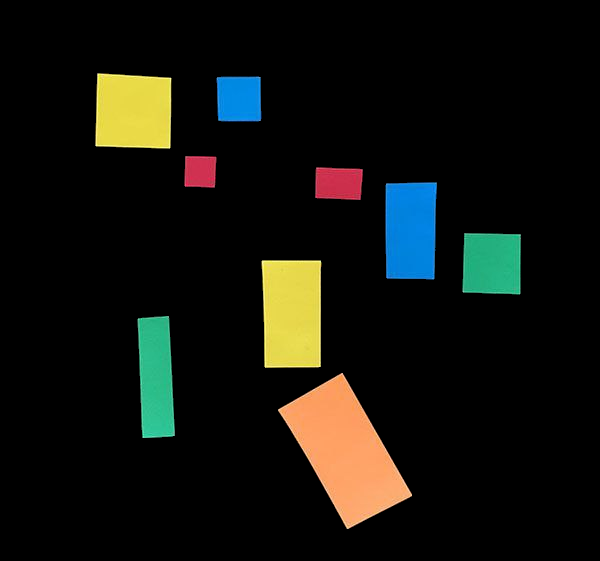

In [39]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# آپلود فایل تصویری
from google.colab import files
uploaded = files.upload()

# خواندن تصویر
image = cv2.imread(list(uploaded.keys())[0])

# تبدیل تصویر به مقیاس خاکستری
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# اعمال فیلتر Gaussian برای کاهش نویز
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# باینری کردن تصویر با استفاده از روش Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# پیدا کردن کانتورها
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# ایجاد ماسک برای نمایش فقط اشکال مربع و مستطیل
mask = np.zeros_like(gray)

# رسم اشکال مربع و مستطیل بر روی ماسک
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # اگر چهارضلعی باشد (مربع یا مستطیل)
        cv2.drawContours(mask, [contour], 0, 255, -1)

# تنها نمایش اشکال مربع و مستطیل از تصویر اصلی
image_only_squares_and_rectangles = np.zeros_like(image)
image_only_squares_and_rectangles[mask == 255] = image[mask == 255]

# نمایش تصویر فقط با اشکال مربع و مستطیل
cv2_imshow(image_only_squares_and_rectangles)